In [35]:
import sys
import pickle
import numpy as np
import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()  # if not use with this line, "AttributeError: 'int' object has no attribute 'value'" 
# tf.disable_eager_execution()
import PIL.Image
%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


##### Set the path to directory containing code of this case

In [37]:
new_path = r'/home/users/suihong/10-SubwaterFansChannels/3-3DGANSim_v2_1/' 
sys.path.append(new_path)

#### Set the path to data directory; this directory includes two datasets: "trainingdata" and "testdata"

In [38]:
data_dir_test = '/scratch/users/suihong/SubwaterFan/DatasetsforGAN_freq_3D_128x128x32/'

#### Set path to trained network

In [7]:
# 19200 means totally 19200 thousand training images (facies models) used for the training
network_dir = '/scratch/users/suihong/SubwaterFan/TrainedModels/009-pgan3D128x128x32_4gpu_follow007/'# '/scratch/users/suihong/SubwaterFan/TrainedModels/001-pgan3D128x128x32_4gpu/'
network_name = 'network-snapshot-008868.pkl' # 'network-snapshot-003362.pkl'

### 1. Fetch dataset

In [ ]:
# Initialize TensorFlow session.
tf.InteractiveSession()

import dataset

test_set = dataset.load_dataset(data_dir=data_dir_test, verbose=True, tfrecord_dir='TestData', 
                                cond_label = True, cond_well = True, cond_prob = True,
                                labeltypes = [], well_enlarge = False, shuffle_mb = 0, prefetch_mb = 0)

# labels are from -1 to 1
cubeorlabel_dict = test_set.get_minibatch_cubeorlabel_np(minibatch_size = 30, lod = 0)  
realcubes_test = cubeorlabel_dict['real']
labels_test = cubeorlabel_dict['label']
proborwell_dict = test_set.get_minibatch_proborwell_np(minibatch_size = 30, lod = 0)
probcubes_test = proborwell_dict['prob']
wellfaciescubes_test = proborwell_dict['well']
# To get original well facies data (before enlargement)
#test_set_1 = dataset.load_dataset(data_dir=data_dir_test, verbose=True, tfrecord_dir='TestData', labeltypes = [], well_enlarge = False, shuffle_mb = 0, prefetch_mb = 0)
#_, wellfacies_test_org = test_set_1.get_minibatch_probandwell_np(2695*8)

In [39]:
print(realcubes_test.shape)
print(labels_test.shape)
print(probcubes_test.shape)
print(wellfaciescubes_test.shape)

(30, 1, 128, 128, 32)
(30, 0)
(30, 0, 128, 128, 32)
(30, 0, 128, 128, 32)


(array([10822045.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,  1546968.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0.,        0.,        0.,  3359627.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        , 1.06666667, 1.13333333, 1.2       , 1.26666667,
        1.33333333, 1.4       , 1.46666667, 1.53333333, 1.6       ,
        1.66666667, 1.73333333, 1.8       , 1.86666667, 1.93333333,
        2.        ]),
 <a list of 30 Patch objects>)

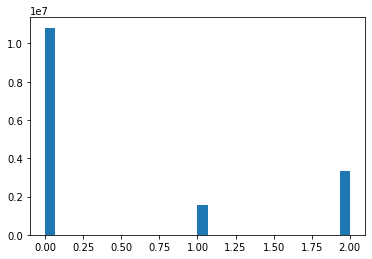

In [41]:
plt.hist(realcubes_test.reshape(-1), bins = 30)

Training facies models of 128x128x32

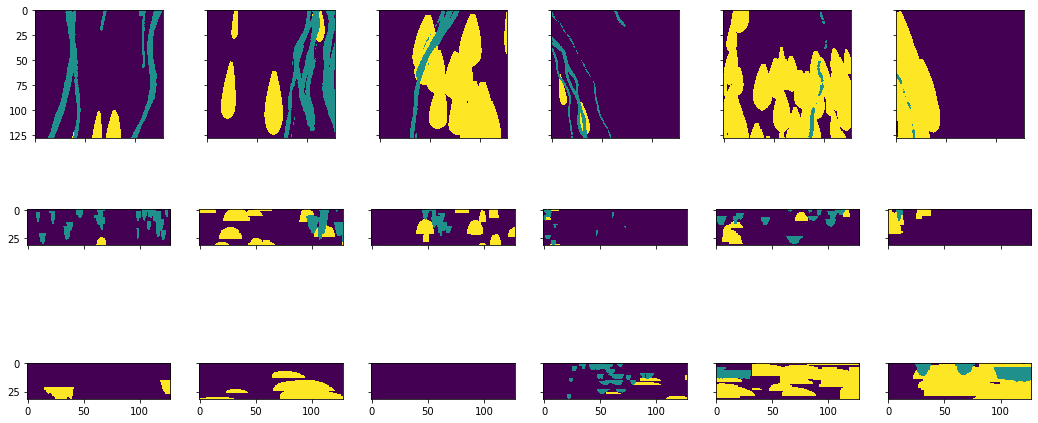

In [14]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=3, sharex='col', sharey='row')
fig.set_size_inches(18, 8, forward=True)

for i in range(6):
    axes[0, i].imshow(realcubes_test[i, 0, :,:,int(realcubes_test.shape[-1]/2)])
    axes[1, i].imshow(np.transpose(realcubes_test[i, 0, int(realcubes_test.shape[-1]/2), :, :], axes=[1, 0]))
    axes[2, i].imshow(np.transpose(realcubes_test[i, 0, :,int(realcubes_test.shape[-1]/2), :], axes=[1, 0]))  

Training facies models of 64x64x16

In [15]:
# labels are from -1 to 1
cubeorlabel_dict = test_set.get_minibatch_cubeorlabel_np(minibatch_size = 30, lod = 1)  
realcubes_test = cubeorlabel_dict['real']
labels_test = cubeorlabel_dict['label']
proborwell_dict = test_set.get_minibatch_proborwell_np(minibatch_size = 30, lod = 1)
probcubes_test = proborwell_dict['prob']
wellfaciescubes_test = proborwell_dict['well']

In [16]:
print(realcubes_test.shape)
print(labels_test.shape)
print(probcubes_test.shape)
print(wellfaciescubes_test.shape)

(30, 1, 64, 64, 16)
(30, 0)
(30, 1, 128, 128, 32)
(30, 1, 128, 128, 32)


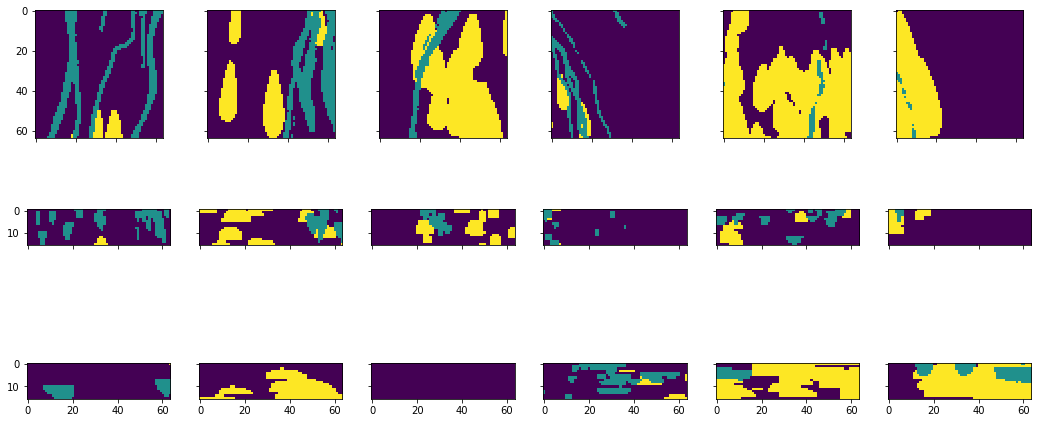

In [17]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=3, sharex='col', sharey='row')
fig.set_size_inches(18, 8, forward=True)

for i in range(6):
    axes[0, i].imshow(realcubes_test[i, 0, :,:,int(realcubes_test.shape[-1]/2)])
    axes[1, i].imshow(np.transpose(realcubes_test[i, 0, int(realcubes_test.shape[-1]/2), :, :], axes=[1, 0]))
    axes[2, i].imshow(np.transpose(realcubes_test[i, 0, :,int(realcubes_test.shape[-1]/2), :], axes=[1, 0]))  

Training facies models of 32x32x8

In [18]:
# labels are from -1 to 1
cubeorlabel_dict = test_set.get_minibatch_cubeorlabel_np(minibatch_size = 30, lod = 2)  
realcubes_test = cubeorlabel_dict['real']
labels_test = cubeorlabel_dict['label']
proborwell_dict = test_set.get_minibatch_proborwell_np(minibatch_size = 30, lod = 2)
probcubes_test = proborwell_dict['prob']
wellfaciescubes_test = proborwell_dict['well']

In [19]:
print(realcubes_test.shape)
print(labels_test.shape)
print(probcubes_test.shape)
print(wellfaciescubes_test.shape)

(30, 1, 32, 32, 8)
(30, 0)
(30, 1, 128, 128, 32)
(30, 1, 128, 128, 32)


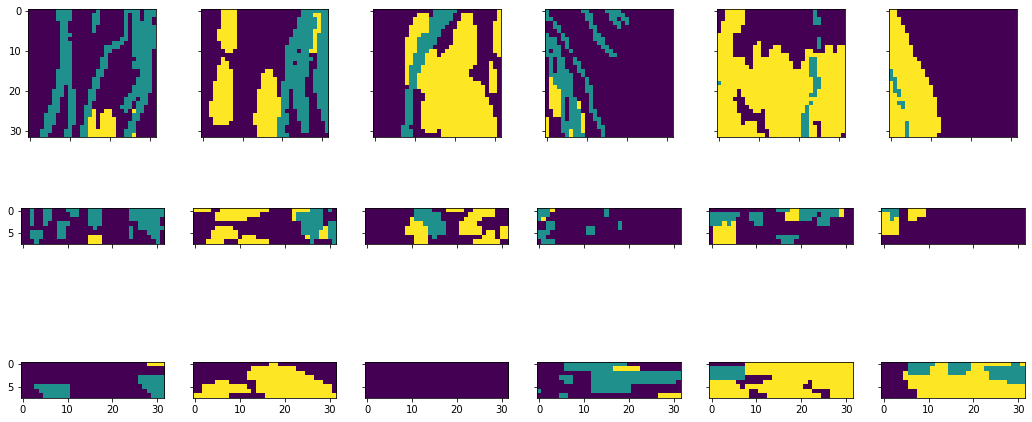

In [20]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=3, sharex='col', sharey='row')
fig.set_size_inches(18, 8, forward=True)

for i in range(6):
    axes[0, i].imshow(realcubes_test[i, 0, :,:,int(realcubes_test.shape[-1]/2)])
    axes[1, i].imshow(np.transpose(realcubes_test[i, 0, int(realcubes_test.shape[-1]/2), :, :], axes=[1, 0]))
    axes[2, i].imshow(np.transpose(realcubes_test[i, 0, :,int(realcubes_test.shape[-1]/2), :], axes=[1, 0]))  

Training facies models of 16x16x4

In [21]:
# labels are from -1 to 1
cubeorlabel_dict = test_set.get_minibatch_cubeorlabel_np(minibatch_size = 30, lod = 3)  
realcubes_test = cubeorlabel_dict['real']
labels_test = cubeorlabel_dict['label']
proborwell_dict = test_set.get_minibatch_proborwell_np(minibatch_size = 30, lod = 3)
probcubes_test = proborwell_dict['prob']
wellfaciescubes_test = proborwell_dict['well']

In [22]:
print(realcubes_test.shape)
print(labels_test.shape)
print(probcubes_test.shape)
print(wellfaciescubes_test.shape)

(30, 1, 16, 16, 4)
(30, 0)
(30, 1, 128, 128, 32)
(30, 1, 128, 128, 32)


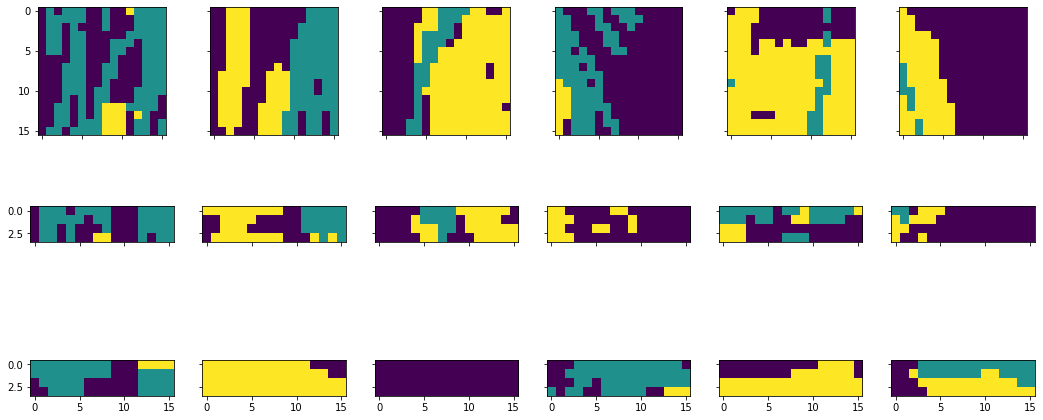

In [23]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=3, sharex='col', sharey='row')
fig.set_size_inches(18, 8, forward=True)

for i in range(6):
    axes[0, i].imshow(realcubes_test[i, 0, :,:,int(realcubes_test.shape[-1]/2)])
    axes[1, i].imshow(np.transpose(realcubes_test[i, 0, int(realcubes_test.shape[-1]/2), :, :], axes=[1, 0]))
    axes[2, i].imshow(np.transpose(realcubes_test[i, 0, :,int(realcubes_test.shape[-1]/2), :], axes=[1, 0]))  

Training facies models of 8x8x4

In [24]:
# labels are from -1 to 1
cubeorlabel_dict = test_set.get_minibatch_cubeorlabel_np(minibatch_size = 30, lod = 4)  
realcubes_test = cubeorlabel_dict['real']
labels_test = cubeorlabel_dict['label']
proborwell_dict = test_set.get_minibatch_proborwell_np(minibatch_size = 30, lod = 4)
probcubes_test = proborwell_dict['prob']
wellfaciescubes_test = proborwell_dict['well']

In [25]:
print(realcubes_test.shape)
print(labels_test.shape)
print(probcubes_test.shape)
print(wellfaciescubes_test.shape)

(30, 1, 8, 8, 4)
(30, 0)
(30, 1, 128, 128, 32)
(30, 1, 128, 128, 32)


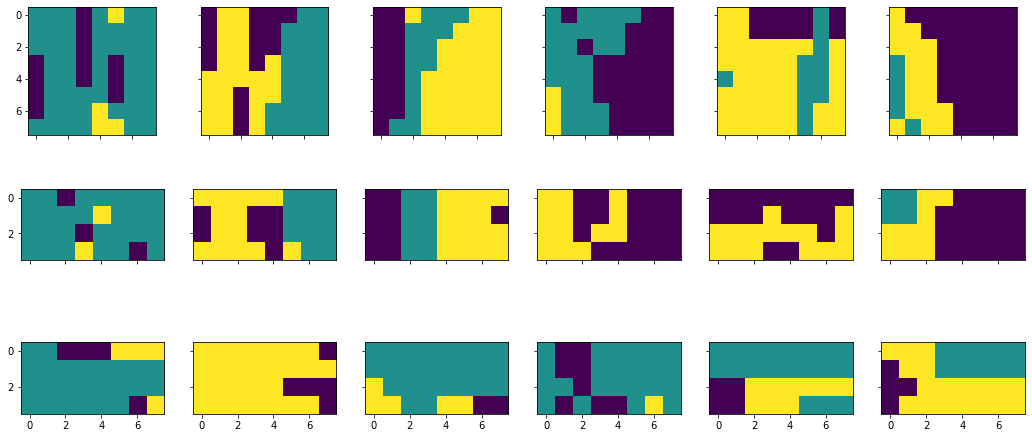

In [26]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=3, sharex='col', sharey='row')
fig.set_size_inches(18, 8, forward=True)

for i in range(6):
    axes[0, i].imshow(realcubes_test[i, 0, :,:,int(realcubes_test.shape[-1]/2)])
    axes[1, i].imshow(np.transpose(realcubes_test[i, 0, int(realcubes_test.shape[-1]/2), :, :], axes=[1, 0]))
    axes[2, i].imshow(np.transpose(realcubes_test[i, 0, :,int(realcubes_test.shape[-1]/2), :], axes=[1, 0]))  

Training facies models of 4x4x4

In [27]:
# labels are from -1 to 1
cubeorlabel_dict = test_set.get_minibatch_cubeorlabel_np(minibatch_size = 30, lod = 5)  
realcubes_test = cubeorlabel_dict['real']
labels_test = cubeorlabel_dict['label']
proborwell_dict = test_set.get_minibatch_proborwell_np(minibatch_size = 30, lod = 4)
probcubes_test = proborwell_dict['prob']
wellfaciescubes_test = proborwell_dict['well']

In [28]:
print(realcubes_test.shape)
print(labels_test.shape)
print(probcubes_test.shape)
print(wellfaciescubes_test.shape)

(30, 1, 4, 4, 4)
(30, 0)
(30, 1, 128, 128, 32)
(30, 1, 128, 128, 32)


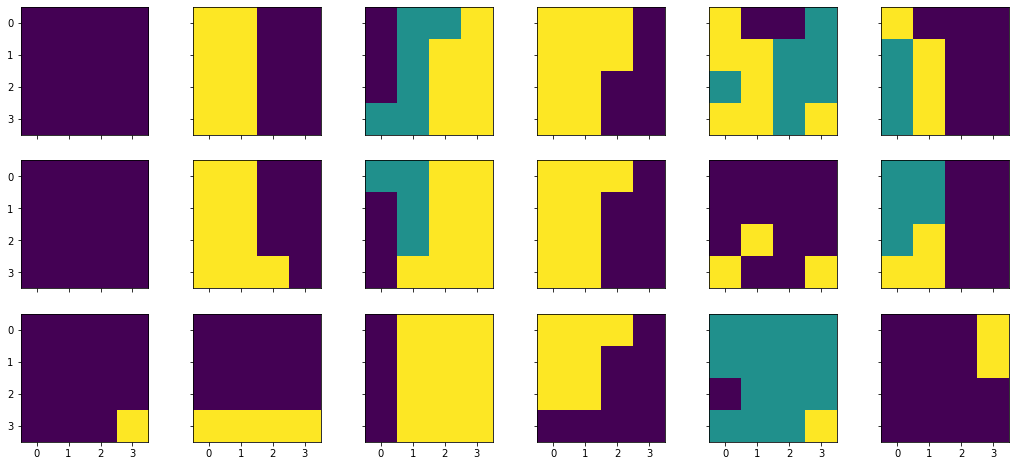

In [29]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=3, sharex='col', sharey='row')
fig.set_size_inches(18, 8, forward=True)

for i in range(6):
    axes[0, i].imshow(realcubes_test[i, 0, :,:,int(realcubes_test.shape[-1]/2)])
    axes[1, i].imshow(np.transpose(realcubes_test[i, 0, int(realcubes_test.shape[-1]/2), :, :], axes=[1, 0]))
    axes[2, i].imshow(np.transpose(realcubes_test[i, 0, :,int(realcubes_test.shape[-1]/2), :], axes=[1, 0]))  

### 2. Import pre-trained Network

In [9]:
# Initialize TensorFlow session.
tf.InteractiveSession()

# Import networks.
with open(network_dir+network_name, 'rb') as file:
    G, D, Gs = pickle.load(file)
    
del G

/share/software/user/open/py-tensorflow/2.6.2_py36/lib/python3.6/site-packages/tensorflow/python/client/session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [11]:
print(Gs.input_shapes)

[[None, 8, 4, 4, 4], [None, 0, 4, 4, 4], [None, 0, 128, 128, 32], [None, 0, 128, 128, 32]]


In [12]:
labels_test = np.zeros((labels_test.shape[0], 0))
probcubes_test = np.zeros((probcubes_test.shape[0], 0, probcubes_test.shape[2], probcubes_test.shape[3], probcubes_test.shape[4]))
wellfaciescubes_test = np.zeros((wellfaciescubes_test.shape[0], 0, wellfaciescubes_test.shape[2], \
                                 wellfaciescubes_test.shape[3], wellfaciescubes_test.shape[4]))

print(realcubes_test.shape)
print(labels_test.shape)
print(probcubes_test.shape)
print(wellfaciescubes_test.shape)

(30, 1, 128, 128, 32)
(30, 0)
(30, 0, 128, 128, 32)
(30, 0, 128, 128, 32)


### 3. Evaluation on 128x128x32 synthetic cases

In [13]:
print(Gs.input_shapes)

[[None, 8, 4, 4, 4], [None, 0, 4, 4, 4], [None, 0, 128, 128, 32], [None, 0, 128, 128, 32]]


In [14]:
TotalReal_no = 400
allfakemodels = np.zeros([TotalReal_no, 1, 128, 128, 32])
latents = np.random.RandomState(412).randn(TotalReal_no, 8, 4, 4, 4)   #

for i in range(int(TotalReal_no/10)):
    latents1 = latents[i*10:(i+1)*10]
    synlabel_mult = np.zeros((10, 0, 4, 4, 4))
    syn_wellfacies_input1_el_mult = np.zeros((10, 0, 128, 128, 32)) 
    synprob1_mult = np.zeros((10, 0, 128, 128, 32)) 
    fakemodels = Gs.run(latents1, synlabel_mult, syn_wellfacies_input1_el_mult, synprob1_mult)
    fakemodels = np.where(fakemodels< -0.2, -1, np.where(fakemodels > 0.2, 1, 0))
    allfakemodels[i*10:(i+1)*10] = fakemodels

(array([1.45042766e+08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.92344600e+07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.54379740e+07]),
 array([-1.        , -0.93333333, -0.86666667, -0.8       , -0.73333333,
        -0.66666667, -0.6       , -0.53333333, -0.46666667, -0.4       ,
        -0.33333333, -0.26666667, -0.2       , -0.13333333, -0.06666667,
         0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
         0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
         0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,
         1.     

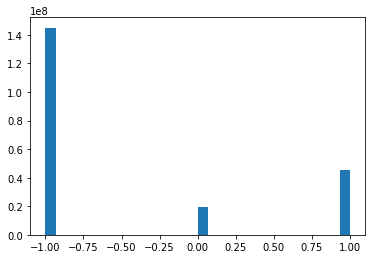

In [34]:
plt.hist(allfakemodels.reshape(-1), bins = 30)

In [16]:
print(allfakemodels.shape)

(400, 1, 128, 128, 32)


In [17]:
TotalReal_no = 400
scores = np.zeros(TotalReal_no)
for i in range(int(TotalReal_no/4)):
    scores[i*4:(i+1)*4] = D.run(allfakemodels[i*4:(i+1)*4])[0][:,0]
    
score_ind = np.argsort(scores)

(array([  1.,   4.,  16.,  44.,  97., 120.,  75.,  30.,   8.,   5.]),
 array([-1399.23364258, -1239.29555206, -1079.35746155,  -919.41937103,
         -759.48128052,  -599.54319   ,  -439.60509949,  -279.66700897,
         -119.72891846,    40.20917206,   200.14726257]),
 <a list of 10 Patch objects>)

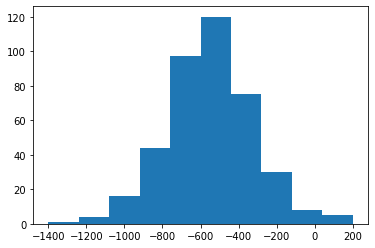

In [23]:
plt.hist(scores.reshape(-1))

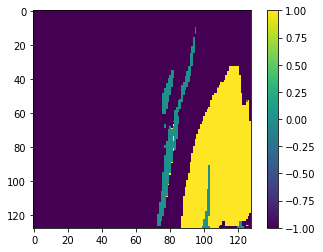

In [22]:
plt.imshow(allfakemodels[score_ind[-5],0, :,:,16])
plt.colorbar()

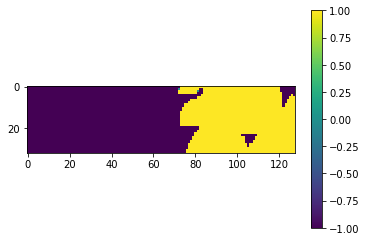

In [19]:
plt.imshow(np.transpose(allfakemodels[score_ind[-1],0, 64,:,:], axes=[1, 0]))
plt.colorbar()

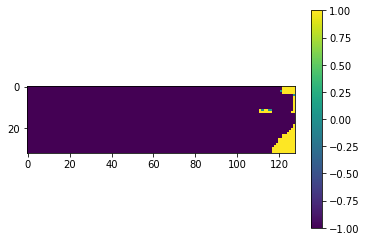

In [20]:
plt.imshow(np.transpose(allfakemodels[score_ind[-1],0, :,64,:], axes=[1, 0]))
plt.colorbar()

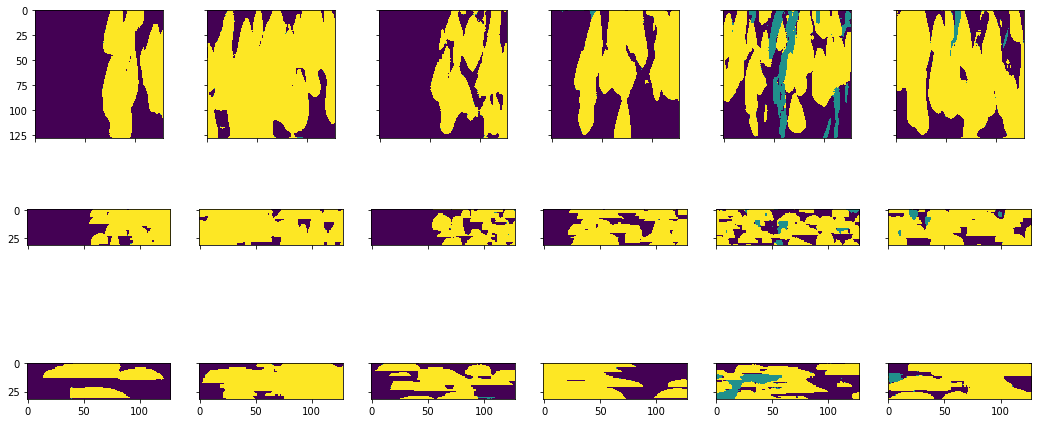

In [24]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=3, sharex='col', sharey='row')
fig.set_size_inches(18, 8, forward=True)

for i in range(6):
    axes[0, i].imshow(allfakemodels[score_ind[-i - 7],0, :,:,16])
    axes[1, i].imshow(np.transpose(allfakemodels[score_ind[-i - 7],0, 64,:,:], axes=[1, 0]))
    axes[2, i].imshow(np.transpose(allfakemodels[score_ind[-i - 7],0, :,64,:], axes=[1, 0]))  

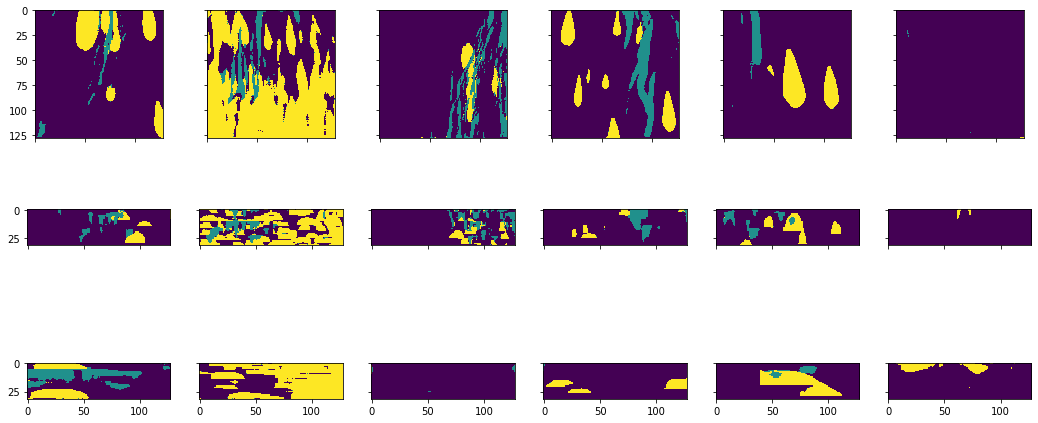

In [25]:
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=3, sharex='col', sharey='row')
fig.set_size_inches(18, 8, forward=True)

for i in range(6):
    axes[0, i].imshow(allfakemodels[i+10,0, :,:,16])
    axes[1, i].imshow(np.transpose(allfakemodels[i+10,0, 64,:,:], axes=[1, 0]))
    axes[2, i].imshow(np.transpose(allfakemodels[i+10,0, :,64,:], axes=[1, 0]))  

##### Save examples into Petrel-readable files

In [26]:
onecube = np.zeros([32, 128, 128])
print(onecube.shape)
coords = np.argwhere(onecube>-1)
print(coords.shape)
coords_output = np.zeros(coords.shape)
coords_output[:,0] = coords[:,2]+1
coords_output[:,1] = coords[:,1]+1
coords_output[:,2] = 32 - coords[:,0]
coords_output = coords_output.astype(np.int16)

(32, 128, 128)
(524288, 3)


In [27]:
print(allfakemodels.shape)

(400, 1, 128, 128, 32)


In [30]:

exampled_fm = allfakemodels[:30] + 1
print(exampled_fm.shape)
exampled_fm_output = exampled_fm.transpose(0,1,4,2,3)[:,:,::-1,::-1,:].reshape(-1, coords.shape[0]).T.astype(np.int)
# exampled_5_fm_output = np.where(exampled_5_fm_output>0,1,-99)
exampled_fm_output_txt = np.concatenate((coords_output, exampled_fm_output), axis = 1)
print(exampled_fm_output_txt.shape)

(30, 1, 128, 128, 32)
(524288, 33)


In [31]:
dirpath = '/scratch/users/suihong/SubwaterFan/TrainedModels/008-pgan3D128x128x32_4gpu_follow007/'
exampled_fm_fname = dirpath + '30GeneratedFaciesModels.txt'
np.savetxt(exampled_fm_fname , exampled_fm_output_txt, fmt='%i', newline='\n')   # "%03d" + "%.10f"*7

with open(exampled_fm_fname, "r") as f:
    contents = f.readlines()
lines = 'PETREL: Properties\n'+'33\n'+'i_index unit1 scale1\n'+'j_index unit1 scale1\n'+'k_index unit1 scale1\n'+\
'Facies unit1 scale1\n'*30
contents.insert(0, lines)
with open(exampled_fm_fname, "w") as f:
    contents = "".join(contents)
    f.write(contents)

## 5. Evaluation with enlarged inputs

In [64]:
tf.disable_v2_behavior()  # if not use with this line, "AttributeError: 'int' object has no attribute 'value'" 

Instructions for updating:
non-resource variables are not supported in the long term


In [65]:
import config
import tfutil

resolution_z = 64
resolution_x = 256
resolution_y = 256

latent_size_z = int(resolution_z/8)  ##input 8x8x8 as latent vector
latent_size_x = int(resolution_x/32)
latent_size_y = int(resolution_y/32)

label_size = 0

Gs_enlarged = tfutil.Network('Gs_enlarged', num_channels=1, label_size=label_size, 
                             resolution_z = resolution_z, resolution_x = resolution_x, resolution_y = resolution_y,
                             latent_size_z = latent_size_z, latent_size_x = latent_size_x,latent_size_y = latent_size_y,    
                             **config.G) #

In [67]:
Gs_enlarged.copy_trainables_from(Gs)

In [66]:
print(Gs_enlarged.input_shapes)

[[Dimension(None), Dimension(8), Dimension(8), Dimension(8), Dimension(8)], [Dimension(None), Dimension(0), Dimension(8), Dimension(8), Dimension(8)], [Dimension(None), Dimension(0), Dimension(256), Dimension(256), Dimension(64)], [Dimension(None), Dimension(0), Dimension(256), Dimension(256), Dimension(64)]]


In [68]:
print(Gs_enlarged.output_shape)

[Dimension(None), Dimension(1), Dimension(256), Dimension(256), Dimension(64)]


In [69]:
latents_lg = np.random.RandomState(412).randn(1, 8, latent_size_x, latent_size_y, latent_size_z)   #
synlabel_lg = np.zeros((1, 0, latent_size_x, latent_size_y, latent_size_z))
syn_wellfacies_lg = np.zeros((1, 0, resolution_x, resolution_y, resolution_z))
synprob_lg = np.zeros((1, 0, resolution_x, resolution_y, resolution_z))

fakemodels = Gs_enlarged.run(latents_lg, synlabel_lg, syn_wellfacies_lg, synprob_lg)
fakemodels = np.where(fakemodels< -0.5, -1, np.where(fakemodels > 0.5, 1, 0))

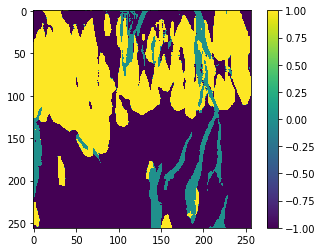

In [70]:
plt.imshow(fakemodels[0,0, :,:,20])
plt.colorbar()

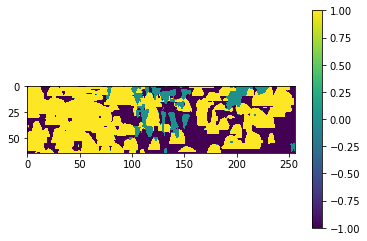

In [71]:
plt.imshow(np.transpose(fakemodels[0,0, 64,:,:], axes=[1, 0]))
plt.colorbar()